# Emotion Detection 

**Importing Libraries**

In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.15.0


**Exploring Dataset** 

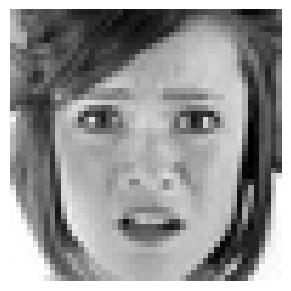

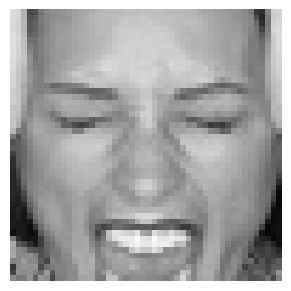

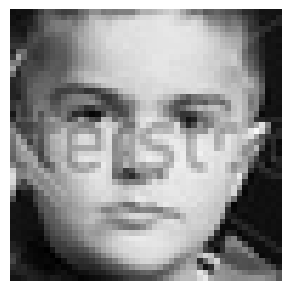

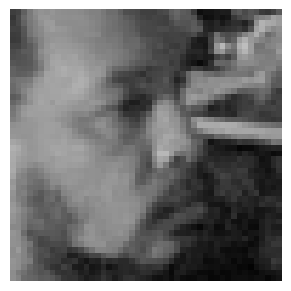

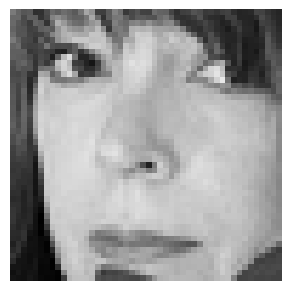

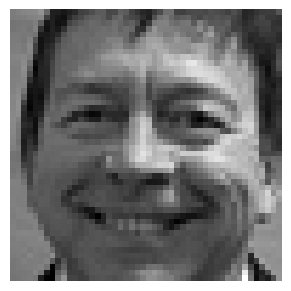

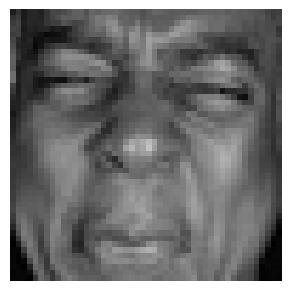

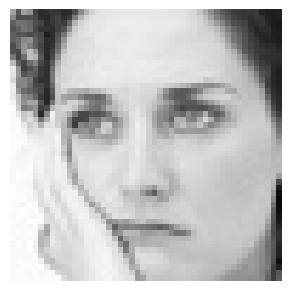

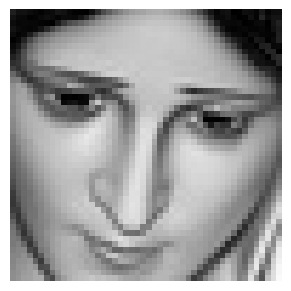

In [3]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for Training**

In [4]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode ="grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode ="grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [5]:
def Convolution(input_tensor, filters, kernal_size):
    x = Conv2D(filters = filters, kernel_size = kernal_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    Activation('relu')(x)
    x = MaxPooling(pool_size = (2,2))(x)
    
    return x

In [6]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [7]:
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = Conv2D(32, (3,3))(inputs)
    conv_2 = Conv2D(64, (5,5))(conv_1)
    conv_3 = Conv2D(128, (3,3))(conv_2)
    flatten_layer = Flatten()(conv_3)
    dense_1 = Dense(256)(flatten_layer)
    output = Dense(7, activation="softmax")(dense_1)
    
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [8]:
model = model_fer((48,48,1))
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        51264     
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 256)               52429056  
                                                                 
 dense_1 (Dense)             (None, 7)                 1799

**Initializing the Model**

In [9]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = "val_accuracy", save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

**Training the Model**

In [10]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1048.7511 - accuracy: 0.2422
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 3824s 8s/step - loss: 1048.7511 - accuracy: 0.2422 - val_loss: 71.0901 - val_accuracy: 0.2656
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 45.7120 - accuracy: 0.2755
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 4005s 9s/step - loss: 45.7120 - accuracy: 0.2755 - val_loss: 31.4590 - val_accuracy: 0.2501
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 21.6340 - accuracy: 0.2878
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 2981s 6s/step - loss: 21.6340 - accuracy: 0.2878 - val_loss: 17.5102 - val_accuracy: 0.2573
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 11.9539 - accuracy: 0.2988
Epoch 4: saving model to model_weights.h5
448/448 [========================

**Model Evaluation**

In [11]:
model.evaluate(validation_generator)

113/113 [==============================] - 640s 5s/step - loss: 2.3882 - accuracy: 0.2604


[2.3882198333740234, 0.2603789269924164]

**Plotting Loss**

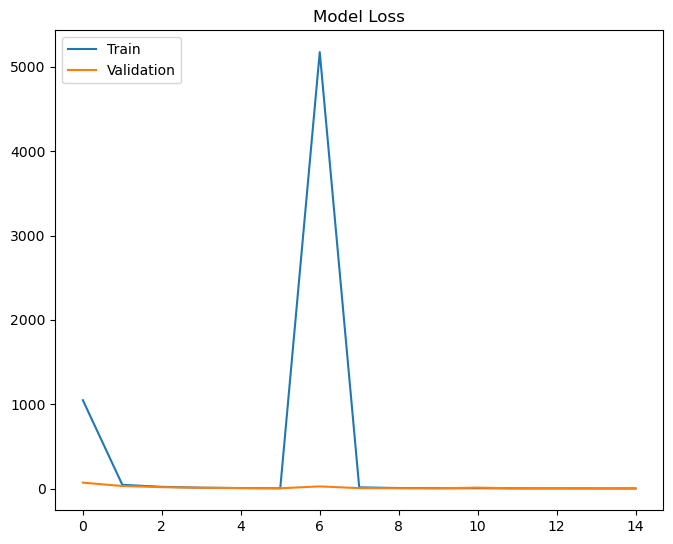

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

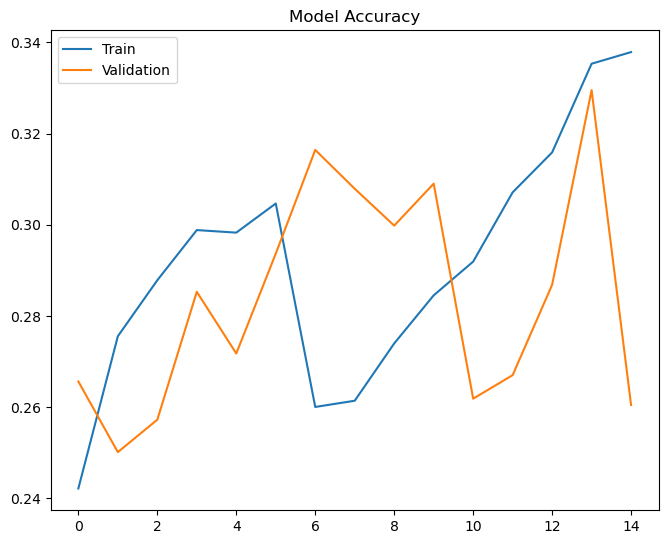

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [ ]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
json_file.write(model_json)